# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import os
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# response = requests.get(url)
# with open ("image-predictions.tsv", mode = 'wb') as file:
#     file.write(response.content)


In [4]:
image_df = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
tweet_df = pd.read_json('tweet-json.txt', lines = True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [8]:
tweet_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
tweet_df['possibly_sensitive_appealable'].value_counts()

0.0    2211
Name: possibly_sensitive_appealable, dtype: int64

In [10]:
tweet_df['possibly_sensitive_appealable'].value_counts()

0.0    2211
Name: possibly_sensitive_appealable, dtype: int64

In [11]:
tweet_df['possibly_sensitive'].value_counts()

0.0    2211
Name: possibly_sensitive, dtype: int64

In [12]:
tweet_df['lang'].value_counts()

en     2336
und       7
in        3
nl        3
ro        1
tl        1
es        1
et        1
eu        1
Name: lang, dtype: int64

In [13]:
tweet_df['retweeted'].value_counts()

False    2354
Name: retweeted, dtype: int64

In [14]:
tweet_df['truncated'].value_counts()

False    2354
Name: truncated, dtype: int64

In [15]:
tweet_df.duplicated(['id']).sum()

0

In [16]:
tweet_df.iloc[[18, 19, 20]]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
18,NaN,NaN,2017-07-22 00:23:06,"[0, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 888554915546542081, 'id_str'...",20290,False,This is Ralphus. He's powering up. Attempting ...,NaN,...,0.0,NaN,NaN,NaN,3732,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
19,NaN,NaN,2017-07-20 16:49:33,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 888078426338406400, 'id_str'...",22201,False,This is Gerald. He was just told he didn't get...,NaN,...,0.0,NaN,NaN,NaN,3653,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
20,NaN,NaN,2017-07-19 16:06:48,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 887705281597243393, 'id_str'...",30779,False,This is Jeffrey. He has a monopoly on the pool...,NaN,...,0.0,NaN,NaN,NaN,5609,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [17]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
image_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [20]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
image_df.duplicated().sum()

0

In [22]:
tweet_df[tweet_df.id == 891327558926688256]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [23]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [25]:
archive_df.duplicated(['tweet_id']).sum()

0

In [26]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [27]:
archive_df.iloc[[18, 19, 20]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
18,888554962724278272,NaN,NaN,2017-07-22 00:23:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphus. He's powering up. Attempting ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888554962...,13,10,Ralphus,None,None,None,None
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
20,888078434458587136,NaN,NaN,2017-07-20 16:49:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888078434...,12,10,Gerald,None,None,None,None


In [28]:
archive_df.loc[4]

tweet_id                                                     891327558926688256
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-29 16:00:24 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Franklin. He would like you to stop ca...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891327558...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [31]:
mask = archive_df.name.str.contains('^[a-z]', regex = True)
archive_df[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [32]:
all_columns = pd.Series(list(tweet_df) + list(image_df) + list(archive_df))
all_columns[all_columns.duplicated()]

43                 tweet_id
44    in_reply_to_status_id
45      in_reply_to_user_id
47                   source
dtype: object

### Quality issues
    1. tweet_df table contains these columns: 
    (['geo', 'coordinates', 'place', 'contributors', 'id_str', 'in_reply_to_status_id_str',        'in_reply_to_user_id_str',  'quoted_status_id_str', 'truncated', 'extended_entities',    'possibly_sensitive_appealable', 'possibly_sensitive','quoted_status_id', 'quoted_status', 'retweeted_status', 'entities', 'retweeted', 'user',  'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_screen_name'],that will not be useful in my analysis

    2. The characters in the 'source' column of the tweet_df table are the full links with the last part of the link being the source of the tweet

    3. The datatype of the 'source' column on the tweet_df table is object instead of category

    4. Inconsistent naming of the created_at, id and full_text columns in the tweet_df table across the rest of the tables to be used for the analysis

    5. The display_text_range column in the tweet_df table contains the text length along with extra characters that are not necessary and it is not of the int datatype

    6. The lang column of the tweet_df table is not a category datatype

    7. The display_test_range column of the tweet_df table is not named properly

    8. archive_df table contains the retweet columns which has non-null values which needs to be removed ad=s they are essentially duplicates of the actual tweets and may skew the results
    
    8. archive_df table contains these columns: 
    (['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'expanded_urls', 'retweeted_status_timestamp','retweeted_status_user_id'], that will not be needed in my analysis

    9. the timestamp column in the tweet_df table contains utc characters and it is not in datetime datatype

    10. the timestamp column in the archive_df table contains utc characters and it is not in datetime datatype

    11. The characters in the 'source' column of the archive_df table are the full links with the last part of the link being the source of the tweet 


    12. Rename all the invalid dog names in the names column of the archive_clean table with 'None'

    13. The text_range, retweet_count, favorite_count column of the twitter_archive_master table should be of int datatype

    14. The characters in the p1, p2, p3 columns of the image_df table contains '_' instead of ' ' and also, should be of string data type

    15. Replace all nan values with 'None'

### Tidiness issues
    1. The doggo, floofer, pupper, puppo colums names should be values for a column named dog_stages.
    2. The archive_df and the tweet_df and the image dataframe should be one table called twitter_archive_master

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
tweet_clean = tweet_df.copy() 
image_clean = image_df.copy()
archive_clean = archive_df.copy()


## Quality Issues


### Issue #1: (Quality)

#### `tweet_df `: columns that are not needed

#### Define:

Drop some of the columns that are not needed for the analysis

#### Code

In [34]:
tweet_clean = tweet_df.drop(['geo', 'coordinates', 'place', 'contributors', 'id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 
                             'quoted_status_id_str', 'truncated', 'extended_entities', 'possibly_sensitive_appealable', 'possibly_sensitive',
                            'quoted_status_id', 'quoted_status', 'retweeted_status', 'entities', 'retweeted', 'user', 
                            'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_screen_name', 'is_quote_status'], axis = 1)

#### Test

In [35]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 9 columns):
created_at            2354 non-null datetime64[ns]
display_text_range    2354 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
full_text             2354 non-null object
id                    2354 non-null int64
lang                  2354 non-null object
retweet_count         2354 non-null int64
source                2354 non-null object
dtypes: bool(1), datetime64[ns](1), int64(3), object(4)
memory usage: 149.5+ KB


### Issue #2: (Quality)

#### `tweet_df `: source should only contain the origin of the tweet and not the link and this column should be a category datatype

#### Define

1. Create a dictionary containing the source links as the key and the last part of the links as the values
2. define a function that goes through the source columns and replaces its content with their correspoinding values in the dictionary
3. Apply the function to the source column
4. convert this column to a category datatype

#### Code

In [36]:
# map source and name for tweet_df in a dictionary
tweet_source = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Iphone',
               '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Web',
               '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine',
               '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}

# function to apply
def source_name(tweet_clean):
    if tweet_clean['source'] in tweet_source.keys():
        short_source = tweet_source[tweet_clean['source']]
        return short_source
    
    
tweet_clean.loc[:, 'source'] = tweet_clean.apply(source_name, axis = 1)
# tweet_clean.loc['source'] = tweet_clean.apply(source_name, axis = 1) 

tweet_clean['source'] = tweet_clean['source'].astype('category')

#### Test

In [37]:
tweet_clean.source.value_counts()

Iphone       2219
Vine           91
Web            33
TweetDeck      11
Name: source, dtype: int64

### Issue #3: (Quality)

#### `tweet_df `: Inconsistent naming of the created_at, id and full_text columns 

#### Define

The columns will be renamed to timestamp, tweet_id and text.

#### Code

In [38]:
tweet_clean.rename(columns = {'created_at': 'timestamp', 'id': 'tweet_id', 'full_text': 'text', 'display_text_range': 'text_range'}, inplace = True)


#### Test

In [39]:
tweet_clean.head()

,timestamp,text_range,favorite_count,favorited,text,tweet_id,lang,retweet_count,source
0,2017-08-01 16:23:56,"[0, 85]",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,en,8853,Iphone
1,2017-08-01 00:17:27,"[0, 138]",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,en,6514,Iphone
2,2017-07-31 00:18:03,"[0, 121]",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,en,4328,Iphone
3,2017-07-30 15:58:51,"[0, 79]",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,en,8964,Iphone
4,2017-07-29 16:00:24,"[0, 138]",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,en,9774,Iphone


### Issue #4: (Quality)

#### `tweet_df `: The display_text_range column in the tweet_df table contains the text length along with extra characters that are not necessary and it is not of the int datatype

#### Define

convert the display_text_range column from object to strring data type, and strip the first 4 characters and the last character from it, leaving only the number characters

#### Code

In [40]:
tweet_clean['text_range'] = tweet_clean['text_range'].astype(str).str.strip().str[4:]
tweet_clean['text_range'] = tweet_clean['text_range'].str.strip().str[:-1]

#### Test

In [41]:
tweet_clean['text_range'].sample(5)

205     113
1587    120
324     102
1898    139
1267    139
Name: text_range, dtype: object

In [42]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 9 columns):
timestamp         2354 non-null datetime64[ns]
text_range        2354 non-null object
favorite_count    2354 non-null int64
favorited         2354 non-null bool
text              2354 non-null object
tweet_id          2354 non-null int64
lang              2354 non-null object
retweet_count     2354 non-null int64
source            2354 non-null category
dtypes: bool(1), category(1), datetime64[ns](1), int64(3), object(3)
memory usage: 133.6+ KB


### Issue #5: (Quality)

#### `tweet_df `: assign some columns their right datatypes

#### Define

Assign a category datatype to the lang column
Assign an int datatype to the text_range column

#### Code

In [43]:
tweet_clean['lang'] = tweet_clean['lang'].astype('category')
tweet_clean['text_range'] = tweet_clean['text_range'].astype(int)

#### Test

In [44]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 9 columns):
timestamp         2354 non-null datetime64[ns]
text_range        2354 non-null int64
favorite_count    2354 non-null int64
favorited         2354 non-null bool
text              2354 non-null object
tweet_id          2354 non-null int64
lang              2354 non-null category
retweet_count     2354 non-null int64
source            2354 non-null category
dtypes: bool(1), category(2), datetime64[ns](1), int64(4), object(1)
memory usage: 117.9+ KB


### Issue #6: (Quality)

#### `tweet_df `: the timestamp column here contains utc characters and is not in datetime datatype

#### Define

Convert the values in the column to a datetime format and then set the tz_convert() to none

#### Code

In [45]:
# tweet_clean['timestamp'] = pd.to_datetime(tweet_clean['timestamp']).dt.tz_convert(None)
tweet_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### Test

### Issuee #7: (Quality)

#### Define

#### `archive_df `: has columns that contains rows that will not be needed that will not be needed for the analysis

#### Code

In [46]:
archive_clean = archive_clean[archive_df.retweeted_status_id.isnull()]

#### Test

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #8: (Quality)

#### `archive_df `: contains columns that will not be needed for the analysis

#### Define

Drop the columns that will not be needed for the analysis

#### Code

In [48]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'expanded_urls', 
                                  'retweeted_status_timestamp','retweeted_status_user_id'], axis = 1)

#### Test

In [49]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue #9: (Quality)

#### `archive_df `: the timestamp column here contains utc characters and is not in datetime datatype

#### Define

Strip the last 6 characters from the values in this column and convert them to a datetime category

#### Code

In [50]:
archive_clean['timestamp'] = archive_clean['timestamp'].str.strip().str[:-6]
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


In [52]:
archive_clean.tail()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None
2355,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8,10,None,None,None,None,None


### Issue #10: (Quality)

#### `archive_df `: source should only contain the origin of the tweet and not the link and this column should be a category datatype

#### Define

1. use the tweet_source dictionary that contains the key:pair values
2. define a function that goes through the source columns and replaces its content with their correspoinding values in the dictionary
3. Apply the function to the source column
4. convert this column to a category datatype

#### Code

In [53]:
# function to apply
def source_name(archive_clean):
    if archive_clean['source'] in tweet_source.keys():
        short_source = tweet_source[archive_clean['source']]
        return short_source
    
    
archive_clean.loc[:, 'source'] = archive_clean.apply(source_name, axis = 1)

# coonvert to category datatype
archive_clean['source'] = archive_clean['source'].astype('category')

#### Test

In [54]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,2017-02-05 21:56:51,Web,Beebop and Doobert should start a band 12/10 w...,12,10,None,None,None,None,None
571,801538201127157760,2016-11-23 21:29:33,Iphone,This is Wallace. He'll be your chau-fur this e...,12,10,Wallace,None,None,None,None
2039,671547767500775424,2015-12-01 04:33:59,Iphone,This is Marley. She chews shoes then feels ext...,10,10,Marley,None,None,None,None
1438,696900204696625153,2016-02-09 03:35:31,Iphone,This is Rosie. She's a Benebark Cumberpatch. S...,12,10,Rosie,None,None,None,None
2102,670679630144274432,2015-11-28 19:04:19,Iphone,This is Pluto. He's holding little waddling do...,8,10,Pluto,None,None,None,None


### Issue #11: (Tidiness)

#### `archive_df `: This df contains values: doggo, floffer, puppo and pupper as column headers

#### Define

1. Create a series called dog_stages from the values of the doggo, floofer, pupper and puppo column joined together, and replace missing values with np.nan

2. define a function 'join_column' that joins characters sepeerated by a comma seperator and converts the characters to string

3. apply this function to the dog_stages series

4. pass the dog_stages  series to the archive_clean df as a column with column name 'dog_stages'

5. Drop the doggo, floofer, puppo and the pupper columns from the archive_clean df

6. replace empty rows in the dog_stages colum with np.nan

#### Code

In [55]:
dog_stages = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', np.nan)

def join_column(a):
    return ', '.join(a.dropna().astype(str))

archive_clean['dog_stages'] = dog_stages.apply(join_column, axis=1)

archive_clean =archive_clean.drop(['doggo', 'floofer','pupper', 'puppo'], axis = 1)

archive_clean['dog_stages'].replace('', np.nan, inplace = True)

#### Test

In [56]:
archive_clean.sample(6)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages
1770,678341075375947776,2015-12-19 22:28:09,Iphone,This pupper likes tape. 12/10 https://t.co/cSp...,12,10,None,pupper
1602,685973236358713344,2016-01-09 23:55:38,Iphone,This is Lorelei. She's contemplating her exist...,11,10,Lorelei,NaN
1487,693095443459342336,2016-01-29 15:36:45,Iphone,This is Milo. He doesn't understand your fancy...,10,10,Milo,pupper
206,852672615818899456,2017-04-13 23:59:28,Iphone,This is Aspen. She's never tasted a stick so s...,12,10,Aspen,NaN
551,804475857670639616,2016-12-02 00:02:45,Iphone,HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13...,13,10,None,NaN
1734,679736210798047232,2015-12-23 18:51:56,Iphone,This pup's name is Sabertooth (parents must be...,9,10,None,NaN


### Issue #12: (Quality)

In the `name` column, there are several values that are not dog names, like 'a', 'the', 'such', etc. These names are not valid names for pets or dogs

#### Define

1. create variable that holds all these invalid dog names
2. create a functiion that iterates through the archive_clean df and replaces all the invalid names found in the `name` column with none
3. apply the function to the archive_clean df

#### Code

In [58]:
unknown_dogs = archive_clean[mask].name
unknown_dogs

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


22              such
56                 a
169            quite
193            quite
335              not
369              one
542       incredibly
649                a
801                a
819             very
852               my
924              one
988              not
992              his
993              one
1002               a
1004               a
1017               a
1025              an
1031            very
1040        actually
1049               a
1063            just
1071         getting
1095             mad
1097            very
1120            this
1121    unacceptable
1138             all
1193               a
            ...     
2191               a
2198               a
2204              an
2211               a
2212             the
2218               a
2222               a
2235               a
2249               a
2255               a
2264               a
2273               a
2287               a
2304               a
2311               a
2314               a
2326         

In [59]:
# function to apply to get rid of the dog names that are not valid
def unknown_names(archive_clean):
    if archive_clean['name'] in unknown_dogs:
        return 'None'
    
    
archive_clean.loc[:, 'name'] = archive_clean.apply(unknown_names, axis = 1)

#### Test

In [60]:
archive_clean[mask].name.value_counts().sort_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Series([], Name: name, dtype: int64)

### Issue #13: (Tidiness)

#### Merge the `tweet_clean ` table to the `archive_clean` table, on the *tweet_id*, *timestamp*,*source*, and *text* columns

#### Define

merge the tweet_clean on to the archive_clean on the tweet_id, timestamp, source and text column to a new table called archive_tweet_merged as these tables contains similar columns and also hold similar information

#### Code

In [61]:
archive_tweet_concated = pd.merge(archive_clean, tweet_clean, how = 'left', on=['tweet_id', 'timestamp', 'source', 'text'])

#### Test

In [62]:
archive_tweet_concated.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,text_range,favorite_count,favorited,lang,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,None,NaN,85,39467,False,en,8853
1,892177421306343426,2017-08-01 00:17:27,Iphone,This is Tilly. She's just checking pup on you....,13,10,None,NaN,138,33819,False,en,6514
2,891815181378084864,2017-07-31 00:18:03,Iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,None,NaN,121,25461,False,en,4328
3,891689557279858688,2017-07-30 15:58:51,Iphone,This is Darla. She commenced a snooze mid meal...,13,10,None,NaN,79,42908,False,en,8964
4,891327558926688256,2017-07-29 16:00:24,Iphone,This is Franklin. He would like you to stop ca...,12,10,None,NaN,138,41048,False,en,9774


In [63]:
archive_tweet_concated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  0 non-null object
dog_stages            344 non-null object
text_range            2175 non-null int64
favorite_count        2175 non-null int64
favorited             2175 non-null bool
lang                  2175 non-null category
retweet_count         2175 non-null int64
dtypes: bool(1), category(2), datetime64[ns](1), int64(6), object(3)
memory usage: 193.9+ KB


### Issue #14: (Tidiness)

#### `archive_tweet_concated `: All tables should be merged into one table called the twitter_archve_master and this master table should be exported to a csv file.

#### Define

1. Merge the archive_tweet_concated and the image_clean df into one general table called the twitter_archive_table. 

2. Replace all nan values with 'None'. this is because the data given by weratedogs did not have these values and there's no way we can get them.

#### Code

In [64]:
twitter_archive_master = pd.merge(archive_tweet_concated, image_clean, how = 'left', on = ['tweet_id'])

twitter_archive_master = twitter_archive_master.replace(np.nan, 'None')



#### Test

In [65]:
twitter_archive_master

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,text_range,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,None,None,85,39467,...,1,orange,0.0970486,False,bagel,0.0858511,False,banana,0.07611,False
1,892177421306343426,2017-08-01 00:17:27,Iphone,This is Tilly. She's just checking pup on you....,13,10,None,None,138,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.0906465,True,papillon,0.0689569,True
2,891815181378084864,2017-07-31 00:18:03,Iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,None,None,121,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.0313789,True
3,891689557279858688,2017-07-30 15:58:51,Iphone,This is Darla. She commenced a snooze mid meal...,13,10,None,None,79,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.0408359,False
4,891327558926688256,2017-07-29 16:00:24,Iphone,This is Franklin. He would like you to stop ca...,12,10,None,None,138,41048,...,2,basset,0.555712,True,English_springer,0.22577,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Iphone,Here we have a majestic great white breaching ...,13,10,None,None,138,20562,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.0769022,False
6,890971913173991426,2017-07-28 16:27:12,Iphone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,None,None,140,12041,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,Iphone,When you watch your owner call another dog a g...,13,10,None,None,118,56848,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.0765069,True
8,890609185150312448,2017-07-27 16:25:51,Iphone,This is Zoey. She doesn't want to be one of th...,13,10,None,None,122,28226,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Iphone,This is Cassie. She is a college pup. Studying...,14,10,None,doggo,133,32467,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.0292482,True


In [66]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 24 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stages            2175 non-null object
text_range            2175 non-null int64
favorite_count        2175 non-null int64
favorited             2175 non-null bool
lang                  2175 non-null object
retweet_count         2175 non-null int64
jpg_url               2175 non-null object
img_num               2175 non-null object
p1                    2175 non-null object
p1_conf               2175 non-null object
p1_dog                2175 non-null object
p2                    2175 non-null object
p2_conf               2175 non-null object
p2_dog                2175 non-nu

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
# twitter_archive_master.to_csv('twitter_archive_master_csv.csv', index = False)

In [68]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,text_range,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,None,None,85,39467,...,1,orange,0.0970486,False,bagel,0.0858511,False,banana,0.07611,False
1,892177421306343426,2017-08-01 00:17:27,Iphone,This is Tilly. She's just checking pup on you....,13,10,None,None,138,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.0906465,True,papillon,0.0689569,True
2,891815181378084864,2017-07-31 00:18:03,Iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,None,None,121,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.0313789,True
3,891689557279858688,2017-07-30 15:58:51,Iphone,This is Darla. She commenced a snooze mid meal...,13,10,None,None,79,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.0408359,False
4,891327558926688256,2017-07-29 16:00:24,Iphone,This is Franklin. He would like you to stop ca...,12,10,None,None,138,41048,...,2,basset,0.555712,True,English_springer,0.22577,True,German_short-haired_pointer,0.175219,True


In [69]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 24 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stages            2175 non-null object
text_range            2175 non-null int64
favorite_count        2175 non-null int64
favorited             2175 non-null bool
lang                  2175 non-null object
retweet_count         2175 non-null int64
jpg_url               2175 non-null object
img_num               2175 non-null object
p1                    2175 non-null object
p1_conf               2175 non-null object
p1_dog                2175 non-null object
p2                    2175 non-null object
p2_conf               2175 non-null object
p2_dog                2175 non-nu

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [70]:
twitter_archive_master[twitter_archive_master['favorite_count'] == 132810]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,text_range,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
348,822872901745569793,2017-01-21 18:26:02,Iphone,Here's a super supportive puppo participating ...,13,10,None,puppo,87,132810,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.0691262,True


In [71]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,text_range,favorite_count,retweet_count
count,2.175000e+03,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000
mean,7.371205e+17,13.215172,10.492874,110.039080,8746.022989,2757.987126
std,6.748668e+16,47.725696,7.019084,27.549585,12052.503836,4646.599662
min,6.660209e+17,0.000000,0.000000,11.000000,52.000000,0.000000
25%,6.768432e+17,10.000000,10.000000,92.000000,1911.500000,608.000000
50%,7.098528e+17,11.000000,10.000000,115.000000,4042.000000,1341.000000
75%,7.894226e+17,12.000000,10.000000,136.000000,11107.000000,3220.000000
max,8.924206e+17,1776.000000,170.000000,165.000000,132810.000000,79515.000000


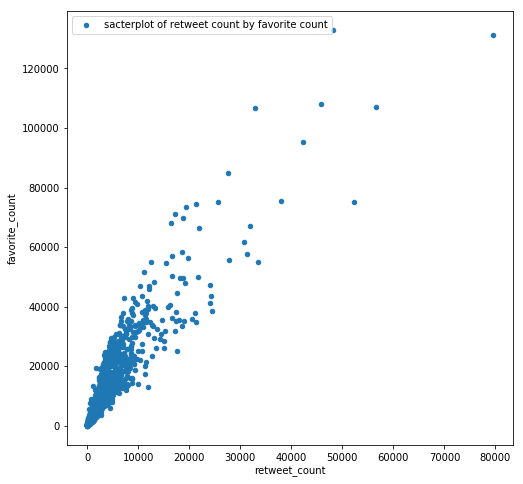

In [72]:
twitter_archive_master.plot('retweet_count', 'favorite_count', kind = 'scatter', figsize = (8,8), label = 'sacterplot of retweet count by favorite count' );

In [73]:
# x = twitter_archive_master.retweet_count
# y = twitter_archive_master.favorite_count
# plt.scatter(x, y);

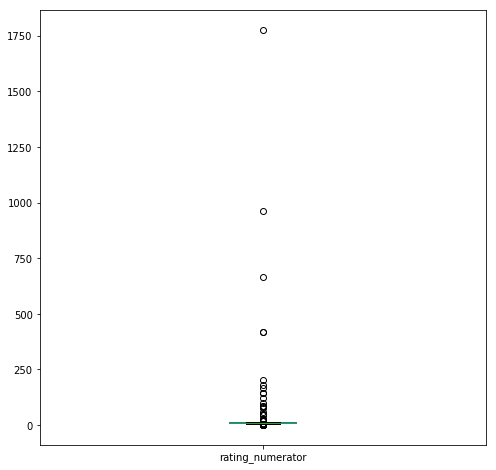

In [81]:
twitter_archive_master['rating_numerator'].plot(kind='box', figsize = (8,8));

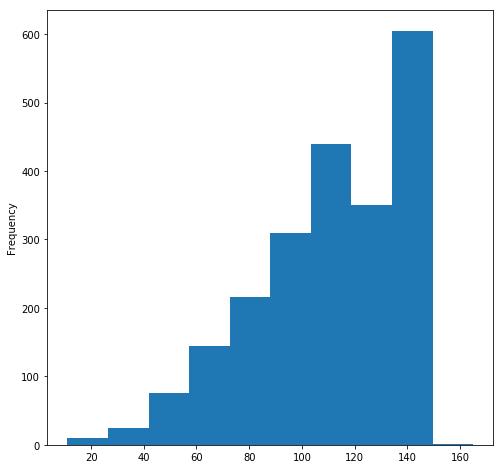

In [82]:
twitter_archive_master['text_range'].plot(kind='hist', figsize=(8,8));

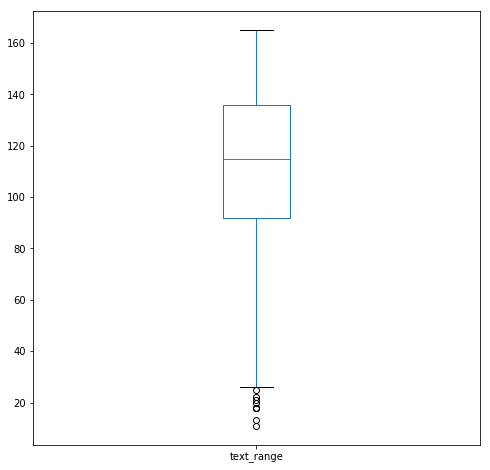

In [76]:
twitter_archive_master['text_range'].plot(kind='box', figsize = (8,8));

In [77]:
twitter_archive_master['text_range'].describe()

count    2175.000000
mean      110.039080
std        27.549585
min        11.000000
25%        92.000000
50%       115.000000
75%       136.000000
max       165.000000
Name: text_range, dtype: float64

In [78]:
twitter_archive_master['name'].value_counts()

None    2175
Name: name, dtype: int64

### Insights:
1. using the .describe() function, theaverage rating numerator is 11, there are some tweets with 0 favorite count, and there are some some p1 confidence that is 0.999984.

2. There's a positive correlation between the retweet_count and the favorite_count

3. USing a box plot, we can clearly see that there are outliers in the rating_numerator column.

4. the values on the text range column is negatively skewed as it is skewed to the left
 
5. There are outliers in the text_range column as visualized using a box plot

6. we can see that dogs without names are the highest occuring

### Visualization

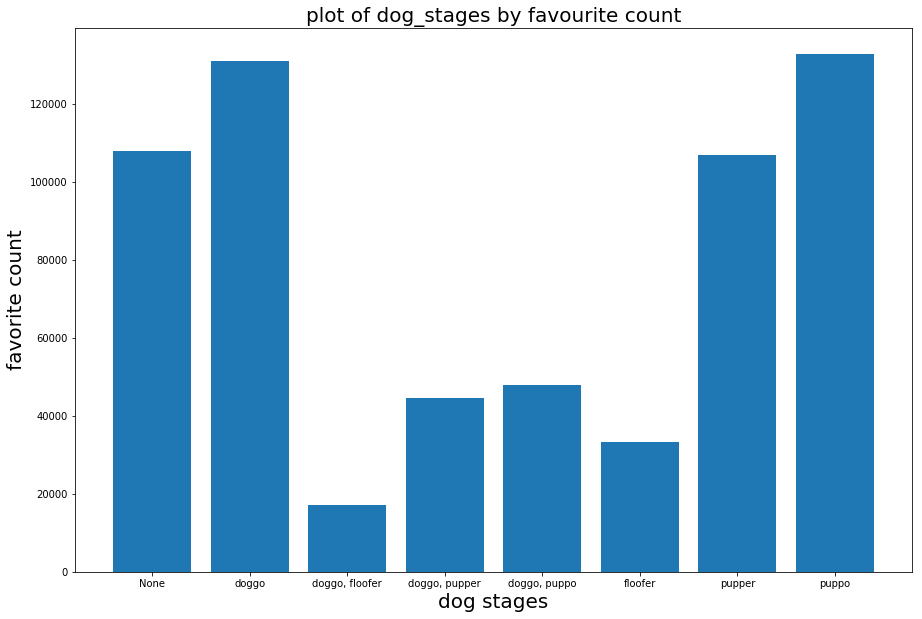

In [79]:
# plot of dog_stages by favourite count
plt.figure(figsize = (15,10))
plt.bar(x = twitter_archive_master['dog_stages'], height = twitter_archive_master['favorite_count'])
plt.title('plot of dog_stages by favourite count', fontsize=20)
plt.xlabel('dog stages', fontsize=20)
plt.ylabel('favorite count', fontsize=20)
plt.show()

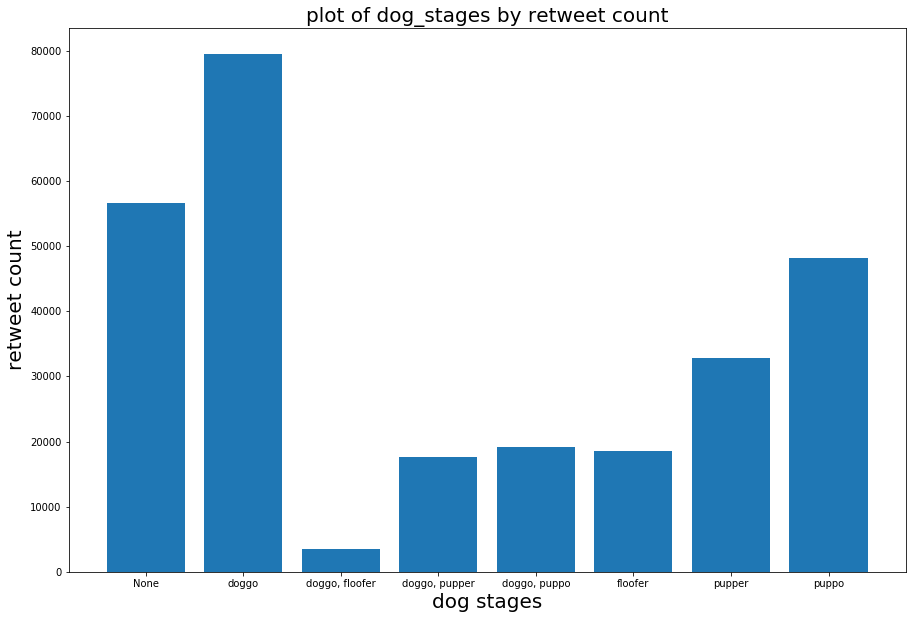

In [80]:
# 'plot of dog_stages by retweet count
plt.figure(figsize = (15,10))
plt.bar(x = twitter_archive_master['dog_stages'], height = twitter_archive_master['retweet_count'])
plt.title('plot of dog_stages by retweet count', fontsize=20)
plt.xlabel('dog stages', fontsize=20)
plt.ylabel('retweet count', fontsize=20)
plt.show()